# Ground Truth problems

These are problems for which the data generating process is a known model, 

$$ y = \phi^*(\mathbf{x}, \theta^*) $$

We assess how well symbolic regression algorithms find the form of the model, $\phi^*$, with some leniency on $\theta^*$ (we allow the model to be off by a constant or a scalar). 

You can just skip to point 3 if there is no aditioal calculation to be done
1. Read srbench data and calculate additional information
2. Read pafam data and convert such that is compatible with srbench data
3. Read finished parfam_data in df_parfam and df_sum
4. Plots:
4.1 Pointplot
4.2 Pairgrid 
4.3 Paretoplot 

# read data from feather

In [1]:
from tabulate import tabulate
import pandas as pd
import json
import numpy as np
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
import os
sns.set(font_scale=1.2)
rdir = ''
# figdir = 'figs/ground-truth/'
figdir = 'figs/'

print('figdir:',figdir)
def save(h=None,name='tmp'):
    name = name.strip().replace(' ','-').replace('%','pct')
    if h == None:
        h = plt.gcf()
    h.tight_layout()
    print('saving',name+'.pdf')
    if not os.path.exists(figdir):
        os.makedirs(figdir)
    plt.savefig(figdir+'/'+name+'.pdf', dpi=400, bbox_inches='tight')
    

figdir: figs/


# 1. Compute results in df_sum

In [2]:
df_results = pd.read_feather(rdir+'ground-truth_results.feather')

In [3]:
df_results.columns

Index(['dataset', 'algorithm', 'random_state', 'process_time',
       'training time (s)', 'target_noise', 'feature_noise', 'true_model',
       'model_size', 'symbolic_model', 'mse_train', 'mae_train', 'r2_train',
       'mse_test', 'mae_test', 'r2_test', 'simplified_symbolic_model',
       'simplified_complexity', 'symbolic_error', 'symbolic_fraction',
       'symbolic_error_is_zero', 'symbolic_error_is_constant',
       'symbolic_fraction_is_constant', 'sympy_exception',
       'training time (hr)', 'r2_zero_test', 'data_group',
       'symbolic_solution'],
      dtype='object')

#### Explore model complexity

In [4]:
df_results['model_size']

0        441
1         49
2         27
3         60
4         19
        ... 
69083     19
69084     19
69085     19
69086     12
69087     12
Name: model_size, Length: 69088, dtype: int64

In [5]:
df_results.groupby('dataset').last().index

Index(['feynman_III_10_19', 'feynman_III_12_43', 'feynman_III_13_18',
       'feynman_III_14_14', 'feynman_III_15_12', 'feynman_III_15_14',
       'feynman_III_15_27', 'feynman_III_17_37', 'feynman_III_19_51',
       'feynman_III_21_20',
       ...
       'strogatz_glider1', 'strogatz_glider2', 'strogatz_lv1', 'strogatz_lv2',
       'strogatz_predprey1', 'strogatz_predprey2', 'strogatz_shearflow1',
       'strogatz_shearflow2', 'strogatz_vdp1', 'strogatz_vdp2'],
      dtype='object', name='dataset', length=130)

In [6]:
df_reduced = df_results[(df_results['dataset'] == 'feynman_III_10_19') & df_results['symbolic_solution']]
for i in df_reduced.index:
    print(f'Symbolic model: {df_results.loc[i, "symbolic_model"]}')    
    print(f'Model size: {df_results.loc[i, "model_size"]}')    
    print(f'Simplified symbolic model: {df_results.loc[i, "simplified_symbolic_model"]}')
    print(f'Simplified complexity: {df_results.loc[i, "simplified_complexity"]}')

Symbolic model: 0.000068803555+(x0*sqrt(((((x3*x3)+(x2*x2)))+(x1*x1))))
Model size: 16
Simplified symbolic model: mom*sqrt(Bx**2 + By**2 + Bz**2)
Simplified complexity: 14.0
Symbolic model: 0.000000000000+(x0*sqrt(((((x2*x2)+(x1*x1)))+(x3*x3))))
Model size: 14
Simplified symbolic model: mom*sqrt(Bx**2 + By**2 + Bz**2)
Simplified complexity: 14.0
Symbolic model: 0.000000000000+(x0*sqrt(((((x3*x3)+(x2*x2)))+(x1*x1))))
Model size: 14
Simplified symbolic model: mom*sqrt(Bx**2 + By**2 + Bz**2)
Simplified complexity: 14.0
Symbolic model: 0.000000000000+(x0*sqrt(((((x3*x3)+(x2*x2)))+(x1*x1))))
Model size: 14
Simplified symbolic model: mom*sqrt(Bx**2 + By**2 + Bz**2)
Simplified complexity: 14.0
Symbolic model: 0.000000000000+(x0*sqrt(((((x3*x3)+(x1*x1)))+(x2*x2))))
Model size: 14
Simplified symbolic model: mom*sqrt(Bx**2 + By**2 + Bz**2)
Simplified complexity: 14.0
Symbolic model: 0.000000000000+(x0*sqrt(((((x3*x3)+(x2*x2)))+(x1*x1))))
Model size: 14
Simplified symbolic model: mom*sqrt(Bx**2 +

(<AxesSubplot: >, 10994.466524942014)

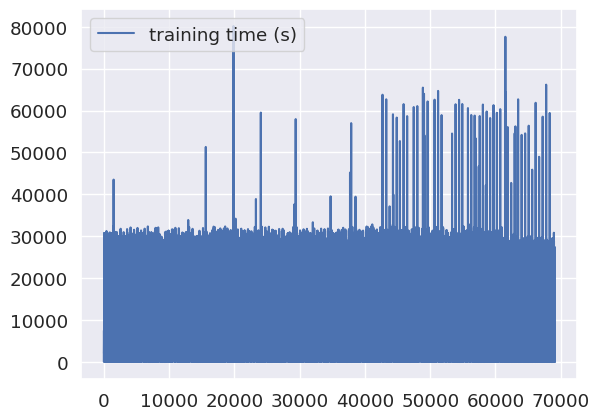

In [7]:
df_results.plot(y='training time (s)'), df_results['training time (s)'].mean()

In [9]:
(df_results['training time (s)'] > (8 * 3600)).mean(), (df_results['training time (s)'] > (8.5 * 3600)).mean(), (df_results['training time (s)'] > (9 * 3600)).mean()

(0.2735207271885132, 0.014865099583140343, 0.0010132005558128763)

#### Explore R² for noisy data

If I read it correctly, they do not add noise on the test data.

In [27]:
df_success_noisy = df_results[(df_results['target_noise'] == 0.1) & df_results['symbolic_solution']]['r2_test']
for i in df_success_noisy.index[:100]:
    print(df_success_noisy.loc[i])

0.9999977287203852
0.9999993999565997
0.9999977754235791
0.9999978898662453
0.9999971969969028
0.9999948423403298
0.9999997938852934
0.9999903693407486
0.9999928330727563
0.9999933284384203
0.9999974614691536
0.9999977520883622
0.9999978903983514
0.999997140824151
0.9999948318826712
0.9999890594728482
0.9999720484402593
0.9998254373852741
0.9991244486278622
0.9991200670178335
0.9999845299632496
0.9999878438567077
0.9999989863365452
0.9999939898903222
0.9999940591205855
0.9999994786762346
0.9999999988842637
0.999998312262543
0.9999968636887412
0.9999999942757168
0.9999697159134333
0.999987754933222
0.9999999999940014
0.9999978080698148
0.9999926468934567
0.9999981271231502
0.9999525440780239
0.9998883024677772
0.999971890663343
0.9999939941158534
0.9999982213581935
0.9999910117932095
0.9999976420381377
0.9999895046858432
0.9999980174545257
0.9999999995828691
0.9999941099664952
0.9999831839283867
0.9999995786897727
0.999997984192148
0.999939540448813
0.9999980614019283
1.0
1.0
0.99999998

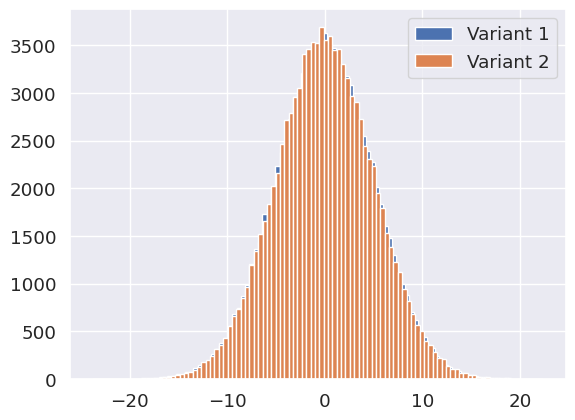

In [20]:
# Quick test that they compute 
plt.hist(np.random.normal(0, 5, size=100000), label='Variant 1', bins=100)
plt.hist(5 * np.random.normal(0, 1, size=100000), label='Variant 2', bins=100)
plt.legend()

### compute symbolic solutions

In [4]:
df_results.loc[:,'symbolic_solution'] = df_results[['symbolic_error_is_zero',
                                                    'symbolic_error_is_constant',
                                                    'symbolic_fraction_is_constant']
                                                   ].apply(any,raw=True, axis=1)
# clean up any corner cases (constant models, failures)
df_results.loc[:,'symbolic_solution'] = df_results['symbolic_solution'] & ~df_results['simplified_symbolic_model'].isna() 
df_results.loc[:,'symbolic_solution'] = df_results['symbolic_solution'] & ~(df_results['simplified_symbolic_model'] == '0')
df_results.loc[:,'symbolic_solution'] = df_results['symbolic_solution'] & ~(df_results['simplified_symbolic_model'] == 'nan')

# save results for detailed tabulating
df_results.to_feather(rdir+'ground-truth_solns.feather')

### summarize results by dataset, including ranking

In [5]:
df_results2 = df_results.merge(df_results.groupby(['dataset','target_noise'])['algorithm'].nunique().reset_index(),
                              on=['dataset','target_noise'],suffixes=('','_count'))
df_results2 = df_results2.drop(['true_model','symbolic_model','simplified_symbolic_model','symbolic_fraction','symbolic_error'],axis=1)
# count repeat trials
df_results2 = df_results2.merge(df_results2.groupby(['algorithm','dataset','target_noise'])['random_state'].nunique().reset_index(),
                                on=['algorithm','dataset','target_noise'],
                                suffixes=('','_repeats'))
# accuracy-based exact solutions 
df_results2['accuracy_solution'] = df_results2['r2_test'].apply(lambda x: x > 0.999).astype(float)

# get mean solution rates for algs on datasets at specific noise levels, averaged over trials 
for soln in ['accuracy_solution','symbolic_solution']:
    df_results2 = df_results2.merge(
        df_results2.groupby(['algorithm','dataset','target_noise'])[soln].mean().reset_index(),
                                  on=['algorithm','dataset', 'target_noise'],suffixes=('','_rate'))

In [6]:
# rankings
for col in [c for c in df_results2.columns if c.endswith('test') or c.endswith('size')]:
    ascending = 'r2' not in col
    df_results2[col+'_rank_per_trial']=df_results2.groupby(
        ['dataset','target_noise','random_state'])[col].apply(
        lambda x:round(x,3).rank(ascending=ascending).astype(int)).reset_index(drop=True) #changed this code
    #got error incompatible index of inserted column with frame index


/home/philipp/anaconda3/envs/srbench/lib/python3.10/site-packages/pandas/core/series.py:2442: RuntimeWarning: overflow encountered in multiply
  result = self._values.round(decimals)


In [7]:
col = df_results2.columns.drop(['sympy_exception'])
df_sum = df_results2[col].groupby(['algorithm','dataset','target_noise','data_group'],as_index=False).median()

In [8]:
# rankings and normalized scores per dataset
for col in [c for c in df_sum.columns if any([c.endswith(n) for n in ['test','size','rate']])]:
    ascending = 'r2' not in col and 'solution' not in col
    df_sum[col+'_rank']=df_sum.groupby(['dataset','target_noise'])[col].apply(
        lambda x:  round(x,3).rank(ascending=ascending).astype(int) ).reset_index(drop=True)
    df_sum[col+'_norm'] = df_sum.groupby(['dataset','target_noise'])[col].apply(lambda x: (x-x.min())/(x.max()-x.min())).reset_index(drop=True)

In [9]:
for soln in ['accuracy_solution','symbolic_solution']:
    df_sum[soln +'_rate_(%)'] = df_sum[soln+'_rate'].apply(lambda x: x*100)
df_sum['rmse_test'] = df_sum['mse_test'].apply(np.sqrt)
df_sum['log_mse_test'] = df_sum['mse_test'].apply(lambda x: np.log(1+x))
df_results = df_results2
#df_sum

# save summary data
used for statistical comparisons

In [204]:
#df_sum.to_csv(rdir+'symbolic_dataset_results_sum.csv.gz',compression='gzip', index=False)

In [3]:
df_sum = pd.read_csv('symbolic_dataset_results_sum.csv.gz', compression='gzip')

In [4]:
df_sum.columns

Index(['algorithm', 'dataset', 'target_noise', 'data_group', 'random_state',
       'process_time', 'training time (s)', 'feature_noise', 'model_size',
       'mse_train', 'mae_train', 'r2_train', 'mse_test', 'mae_test', 'r2_test',
       'simplified_complexity', 'symbolic_error_is_zero',
       'symbolic_error_is_constant', 'symbolic_fraction_is_constant',
       'training time (hr)', 'r2_zero_test', 'symbolic_solution',
       'algorithm_count', 'random_state_repeats', 'accuracy_solution',
       'accuracy_solution_rate', 'symbolic_solution_rate',
       'model_size_rank_per_trial', 'mse_test_rank_per_trial',
       'mae_test_rank_per_trial', 'r2_test_rank_per_trial',
       'r2_zero_test_rank_per_trial', 'model_size_rank', 'model_size_norm',
       'mse_test_rank', 'mse_test_norm', 'mae_test_rank', 'mae_test_norm',
       'r2_test_rank', 'r2_test_norm', 'r2_zero_test_rank',
       'r2_zero_test_norm', 'accuracy_solution_rate_rank',
       'accuracy_solution_rate_norm', 'symbolic_sol

# 2. Change ParFam Data 

In [87]:
df_parfam = pd.read_csv("../results_for_the_paper/With limits/Without noise/results_best_hp.csv")

### Get only all iter values with maxiter1 = 100

In [88]:
mask = df_parfam["maxiter1"]==100
df_parfam = df_parfam[mask]

# Drop all duplicates and keep the first occurrence
df_parfam = df_parfam.drop_duplicates(subset=["dataset"],keep='last')

df_parfam = df_parfam.drop(['max_deg_input', 'max_deg_output',
       'max_deg_input_denominator', 'max_deg_output_denominator',
       'max_deg_output_polynomials_specific',
       'max_deg_output_polynomials_denominator_specific', 'width',
       'function_names', 'maximal_potence', 'maxiter2',
        'optimizer', 'classifier',
       'local_minimizer', 'pruning_iterations', 'pruning_cut_off',
       'maxiter_per_dim_local_minimizer', 'max_dataset_length', 'lambda_1',
       'repetitions', 'parallel', 'n_processes', 'lambda_1_cut',
       'lambda_1_piecewise', 'device'],axis=1)

In [89]:
print(df_parfam.columns)
df_sum.columns

Index(['Index', 'maximal_n_functions', 'maxiter1', 'target_noise',
       'feature_noise', 'accuracy', 'time_limit', 'evaluations_limit',
       'iterative_finetuning', 'max_n_active_parameters', 'dataset',
       'target_formula', 'estimated_formula', 'relative_l2_train',
       'relative_l2_val', 'relative_l2_test', 'r_squared_val',
       'r_squared_test', 'success', 'training_time', 'n_active_coefficients',
       'n_active_coefficients_reduced', 'relative_l2_distance_test_reduced',
       'r_squared_test_reduced', 'r_squared_val_reduced',
       'best_formula_reduced', 'n_evaluations', 'r_squared_test_final',
       'n_active_coefficients_final', 'estimated_formula_final',
       'symbolic_recovery_final', 'accuracy_solution_final'],
      dtype='object')


Index(['algorithm', 'dataset', 'target_noise', 'data_group', 'random_state',
       'process_time', 'training time (s)', 'feature_noise', 'model_size',
       'mse_train', 'mae_train', 'r2_train', 'mse_test', 'mae_test', 'r2_test',
       'simplified_complexity', 'symbolic_error_is_zero',
       'symbolic_error_is_constant', 'symbolic_fraction_is_constant',
       'training time (hr)', 'r2_zero_test', 'symbolic_solution',
       'algorithm_count', 'random_state_repeats', 'accuracy_solution',
       'accuracy_solution_rate', 'symbolic_solution_rate',
       'model_size_rank_per_trial', 'mse_test_rank_per_trial',
       'mae_test_rank_per_trial', 'r2_test_rank_per_trial',
       'r2_zero_test_rank_per_trial', 'model_size_rank', 'model_size_norm',
       'mse_test_rank', 'mse_test_norm', 'mae_test_rank', 'mae_test_norm',
       'r2_test_rank', 'r2_test_norm', 'r2_zero_test_rank',
       'r2_zero_test_norm', 'accuracy_solution_rate_rank',
       'accuracy_solution_rate_norm', 'symbolic_sol

In [90]:
#Rename columns_names
new_column_names = {'relative_l2_test': 'mse_test', #to be changed to test data set
                    'r_squared_test_final': 'r2_test', 
                    'relative_l2_train': 'mse_train',
                    'r_squared_train': 'r2_train',
                    'training_time':'training time (s)',
                     'n_active_coefficients_final':'model_size',
                    'symbolic_recovery_final':'symbolic_solution'} #is it the same: model_size and number coefficients?
df_parfam.rename(columns=new_column_names, inplace=True)

In [91]:
#Add new columns
df_parfam["algorithm"]="ParFam"
df_parfam.loc[df_parfam['dataset'].str.contains('feynman'), "data_group"] = "Feynman"
df_parfam.loc[df_parfam['dataset'].str.contains('strogatz'), "data_group"] = "Strogatz"
df_parfam['training time (hr)'] = df_parfam['training time (s)']/(60*60)
df_parfam['rmse_test']=df_parfam["mse_test"].apply(np.sqrt)
df_parfam['log_mse_test']=df_parfam["mse_test"].apply(lambda x: np.log(1+x))
df_parfam['accuracy_solution'] = df_parfam['r2_test'].apply(lambda x: x > 0.999).astype(float)
#Rankings -> comput later on 
#df_parfam['model_size_rank']=df_parfam.groupby(['dataset','target_noise'])['model_size'].apply(
        #lambda x:  round(x,3).rank(ascending=ascending).astype(int) ).reset_index(drop=True)
#df_parfam['r2_test_rank']=df_parfam.groupby(['dataset','target_noise'])['r2_test'].apply(
        #lambda x:  round(x,3).rank(ascending=ascending).astype(int) ).reset_index(drop=True)

### Group df_parfam in order to get solution rate

In [92]:
# get mean solution rates for algs on datasets at specific noise levels, averaged over trials 
for soln in ['accuracy_solution','symbolic_solution']:
    df_parfam = df_parfam.merge(
        df_parfam.groupby(['algorithm','dataset','target_noise'])[soln].mean().reset_index(),
                                  on=['algorithm','dataset', 'target_noise'],suffixes=('','_rate'))
for soln in ['accuracy_solution','symbolic_solution']:
    df_parfam[soln +'_rate_(%)'] = df_parfam[soln+'_rate'].apply(lambda x: x*100)

### Get rid of negartive r2_test

In [93]:
#some r2 values in df_sum are negative. just set themto zero
df_parfam["r2_test"] = df_parfam["r2_test"].apply(lambda x: max(x, 0))

### Save df_parfam

In [94]:
df_parfam.to_csv("results_parfam.csv")

# 3. Read df_sum and df_parfam

In [4]:
df_parfam = pd.read_csv("results_parfam.csv")
df_sum = pd.read_csv('symbolic_dataset_results_sum.csv.gz', compression='gzip')

# 4. Plots

# solution rates by alg/dataset/noise

In [5]:
#some r2 values in df_sum are negative. just set themto zero
df_sum["r2_test"] = df_sum["r2_test"].apply(lambda x: max(x, 0))
#Add df_parfam to df_sum
df_sum = pd.concat([df_sum, df_parfam], ignore_index=True)

In [215]:
''' Get rid of following formulas: feynman_I_26_2,arcsin(n*sin(theta2)),feynman_I_30_5,arcsin(lambd/(n*d))
                                   feynman_test_10,arccos((cos(theta2)-v/c)/(1-v/c*cos(theta2))), feynman_I_15_10, no formula
'''
df_sum = df_sum[~df_sum['dataset'].isin(['feynman_I_26_2', 'feynman_I_30_5','feynman_test_10','feynman_I_15_10'])]

In [216]:
df_sum=df_sum[df_sum['target_noise'].isin([0,0.01])]
#df_sum=df_sum[df_sum["data_group"]=="Feynman"]
df_sum.reset_index(drop=True, inplace=True) # Reset the index
df_sum= df_sum.drop_duplicates()
#df_sum

In [217]:
#Compute ranks again
#df_sum['model_size_rank']=df_sum.groupby(['dataset','target_noise'])['model_size'].apply(
        #lambda x:  round(x,3).rank(ascending=True).astype(int) ).reset_index(drop=True)
#df_sum['r2_test_rank']=df_sum.groupby(['dataset','target_noise'])['r2_test'].apply(
        #lambda x:  round(x,3).rank(ascending=False).astype(int) ).reset_index(drop=True)

In [218]:
tmp = df_sum.groupby(['target_noise','algorithm'])['symbolic_solution_rate_(%)'].mean().round(2)#.unstack().transpose()
order = tmp.sort_values(ascending=False).index
tmp[order].unstack().transpose()

target_noise,0.00,0.01
algorithm,,
AFP,20.64,16.43
AFP_FE,26.43,20.16
AIFeynman,53.06,12.71
BSR,2.33,0.08
DSR,19.86,19.07
EPLEX,12.11,8.29
FEAT,0.10,0.00
FFX,0.00,0.00
GP-GOMEA,27.33,4.73


# 4.1 Pointplot: plot comparisons

In [301]:
def plot_errorbars(x):
    global var
    confidence_level = 0.95
    
    if var >0:
        mean = np.mean(x)
        margin_of_error = 1.96 * np.std(x) / np.sqrt(len(x))  # Calculate the margin of error for a 95% confidence interval
        x1 = mean - margin_of_error
        x2 = mean + margin_of_error
    else:   
        x1 = np.nan
        x2 = np.nan
    var +=1
    return (x1,x2)

sns.set_style('whitegrid')
def compare(df_compare=None, x='r2_test',y='algorithm', row=None, col=None, scale=None, xlim=[], est=np.mean,
            orient='h', hue=None,order=None, **kwargs):
    df_compare = df_compare.copy()
    if row==None and col == None:
        aspect=1
    else:
        aspect=0.65
#     plt.figure(figsize=(8,7))
    if order is None:
        tmp = df_compare.groupby(['target_noise',y])[x].apply(est).unstack().mean()
        order = tmp.sort_values(ascending=False).index
    
    for c in [x,y,row,col]:
        if c:
            df_compare = df_compare.rename(columns={c:c.replace('_',' ').title()})
        
    x = x.replace('_',' ').title()
    y = y.replace('_',' ').title()
    if row:
        row = row.replace('_',' ').title()
    if col:
        col = col.replace('_',' ').title()
    
    if scale=='log' and len(xlim)>0 and xlim[0] == 0:
        df_compare.loc[:,x] += 1
        xlim[0] = 1
        xnew = '1 + '+x
        df_compare=df_compare.rename(columns={x:xnew})
        x = xnew
    if orient=='v':
        tmp = x
        x = y
        y = tmp
    if col and not row:
        col_wrap = min(4, df_compare[col].nunique()) 
    else:
        col_wrap=None

    cat_args = dict(
                data=df_compare, 
                kind='point',
                y=y,
                x=x,
                order=order,
                row=row,
                col=col,
                col_wrap=col_wrap,
                palette='flare_r',
                margin_titles=True,
                aspect=aspect,
                hue=hue,
                legend_out=False,
                errorbar = plot_errorbars
    )
    cat_args.update(kwargs)
    g = sns.catplot( **cat_args )
    
    
    if hue:
        g._legend.remove() #(title=hue.replace('_',' ').title())
        g.axes.flat[-1].legend(title=hue.replace('_',' ').title(),
                               fontsize=10,loc='lower right'
                              )
    for ax in g.axes.flat: 
        ax.yaxis.grid(True)
        ax.set_ylabel('')
        #Set ParFam index to bold on y axis
        y_labels = ax.get_yticklabels()
        if y_labels:
            y_labels[0].set_fontweight('bold')
            ax.set_yticklabels(y_labels)
            
        ax.set_xlabel(ax.get_xlabel().replace('Symbolic ',''))
        if col:
            ttl = ax.get_title()
            ax.set_title(ttl.replace(col,'').replace('=',''))
    #Set title for no data_group
    if col is None:
        plt.title("SRBench ground truth problems")
    
    if len(xlim)>0:
        plt.xlim(xlim[0],xlim[1])
    if scale:
        plt.gca().set_xscale(scale)

    sns.despine(left=True, bottom=True)
    savename = '-'.join(['cat-'+cat_args['kind']+'plot',x+ '-by-'+ y])
    if row: savename += '_'+row
    if col: savename += '_'+col
    
    save(g, savename )

saving cat-pointplot-Symbolic-Solution-Rate-(pct)-by-Algorithm.pdf
saving cat-pointplot-Symbolic-Solution-Rate-(pct)-by-Algorithm_Data-Group.pdf
saving cat-pointplot-R2-Test-by-Algorithm.pdf
saving cat-pointplot-R2-Test-by-Algorithm_Data-Group.pdf
saving cat-pointplot-Accuracy-Solution-by-Algorithm.pdf
saving cat-pointplot-Accuracy-Solution-by-Algorithm_Data-Group.pdf


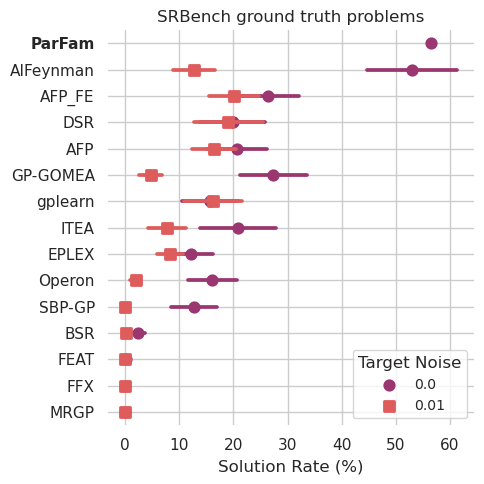

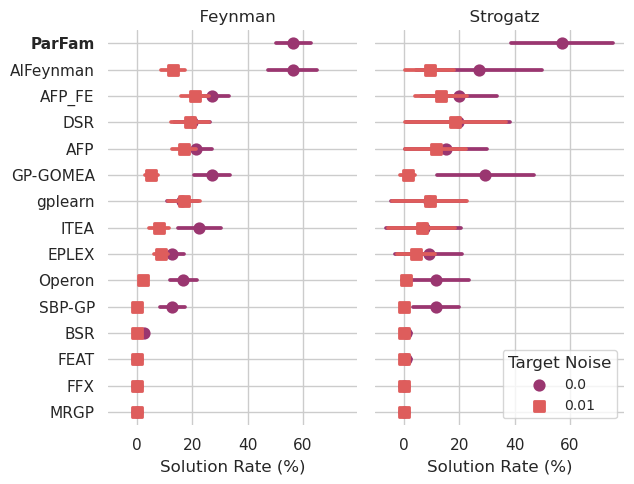

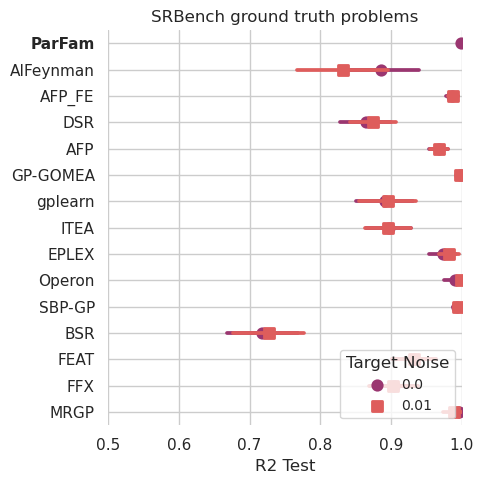

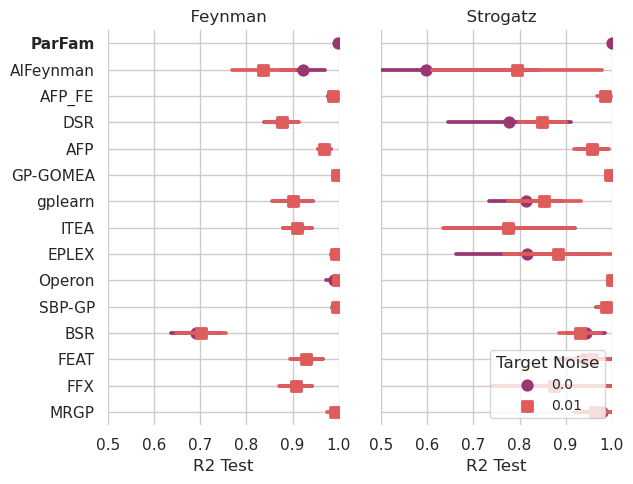

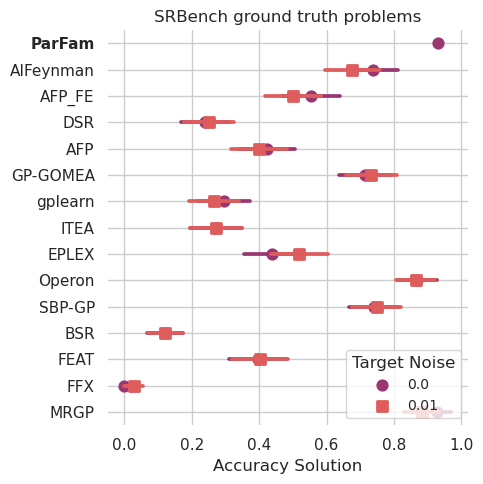

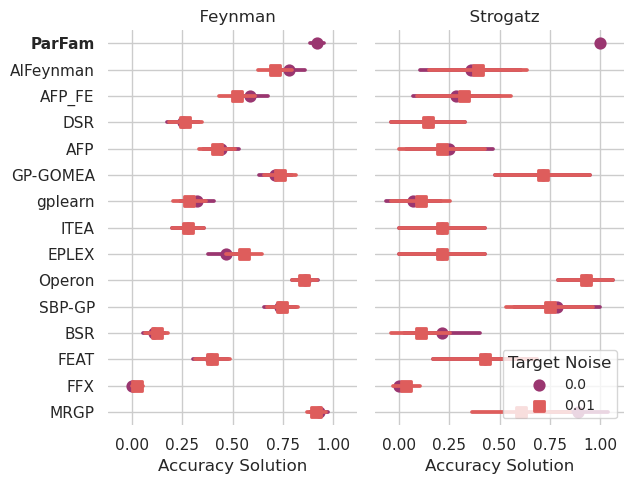

In [302]:
#Calculate on order used for all pirctures
tmp =  df_sum.groupby(['target_noise','algorithm'])['symbolic_solution_rate_(%)'].apply(np.mean).unstack().mean()
order = tmp.sort_values(ascending=False).index.tolist() # Sort values
#Set ParFam to first value of order
order.remove("ParFam")
order = ["ParFam"]+order
order = pd.Index(order,name='algorithm')

for metric in ['symbolic_solution_rate_(%)','r2_test','accuracy_solution']:
# for metric in ['r2_test']:
    for kind in ['point']: #,'strip']:
        args =dict(df_compare=df_sum, x=metric, est=np.mean, orient='h',
                   kind=kind,order=order) 
        if kind=='point': 
            args['join'] = False 
            args['markers']=['o','s','x','+']
        if metric == 'r2_test':
            args['xlim'] = [0.5, 1]
        var=0
        compare(**args,
                hue='target_noise', 
                col=None,
                ) 
        compare(**args, 
                hue='target_noise', 
                col='data_group',
                ) 

## 4.2 PairGrid

In [305]:
def plot_errorbars_median(x):
    global var

    confidence_level = 0.95
    num_bootstrap_samples = 1000
    
    if var%29==0:
        median_ci = (np.nan, np.nan)
    else:
        median_ci = np.percentile(np.median(np.random.choice(x, (num_bootstrap_samples, len(x)), replace=True), axis=1), 
                                  [(1 - confidence_level) / 2 * 100, (1 + confidence_level) / 2 * 100])

        
    var += 1
    return median_ci

def pairgrid(df_plot,x_vars,datagroup=""):
    if datagroup!="":
        df_plot = df_plot[df_plot["data_group"]==datagroup]
        
    g = sns.PairGrid(df_plot, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.7,
                 hue='target_noise',
                 palette='flare_r'
#                  hue_order=[0.01,0.001,0]
#                  hue='dataset'
                )

    g.map(sns.pointplot, 
          #size=10,
          orient="h",
          #jitter=False,
          order=order,
          palette='flare_r',
          errwidth=2,
          #linewidth=0.01,
          #markeredgecolor='w',
          join=False,
          estimator=np.median,
          n_boot=1000,
          markers=['o','x'],
          scale=1.2,
          errorbar = plot_errorbars_median
          #markeralpha=0.5
         )
    
    if datagroup=="":
        g.fig.suptitle("SRBench ground truth problems",y=1.02)
    else:
        g.fig.suptitle(datagroup,y=1.02)
    #Set ParFam index to bold on y axis
    subplot_index=0
    y_labels = g.axes[subplot_index, 0].get_yticklabels()
    y_labels[0].set_fontweight('bold')
    g.axes[subplot_index, 0].set_yticklabels(y_labels)

    plt.legend(title='Target Noise')
    titles = [x.replace('_',' ').title().replace('(S)','(s)') for x in x_vars]

    for ax, title in zip(g.axes.flat, titles):
        # remove xlabel
        ax.set_xlabel('')
        ax.set_ylabel('')
        # Set a different title for each axes
        ax.set(title=title)
        if any([n in title.lower() for n in ['size','complexity','time']]):
            ax.set_xscale('log')
        if 'R2' in title and 'Rank' not in title:
            ax.set(title=title.replace('R2','$R^2$'))
            ax.set_xlim([0,1])
        # Make the grid horizontal instead of vertical
        ax.yaxis.grid(True)
        
    save(g, 'pairgrid_'+'_'.join(x_vars)+'_'+datagroup)

/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/groups/ai/hauger/miniconda3/envs/fn/

saving pairgrid_r2_test_model_size_training-time-(s)_.pdf


/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/groups/ai/hauger/miniconda3/envs/fn/

saving pairgrid_r2_test_model_size_training-time-(s)_Feynman.pdf


/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/groups/ai/hauger/miniconda3/envs/fn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/groups/ai/hauger/miniconda3/envs/fn/

saving pairgrid_r2_test_model_size_training-time-(s)_Strogatz.pdf


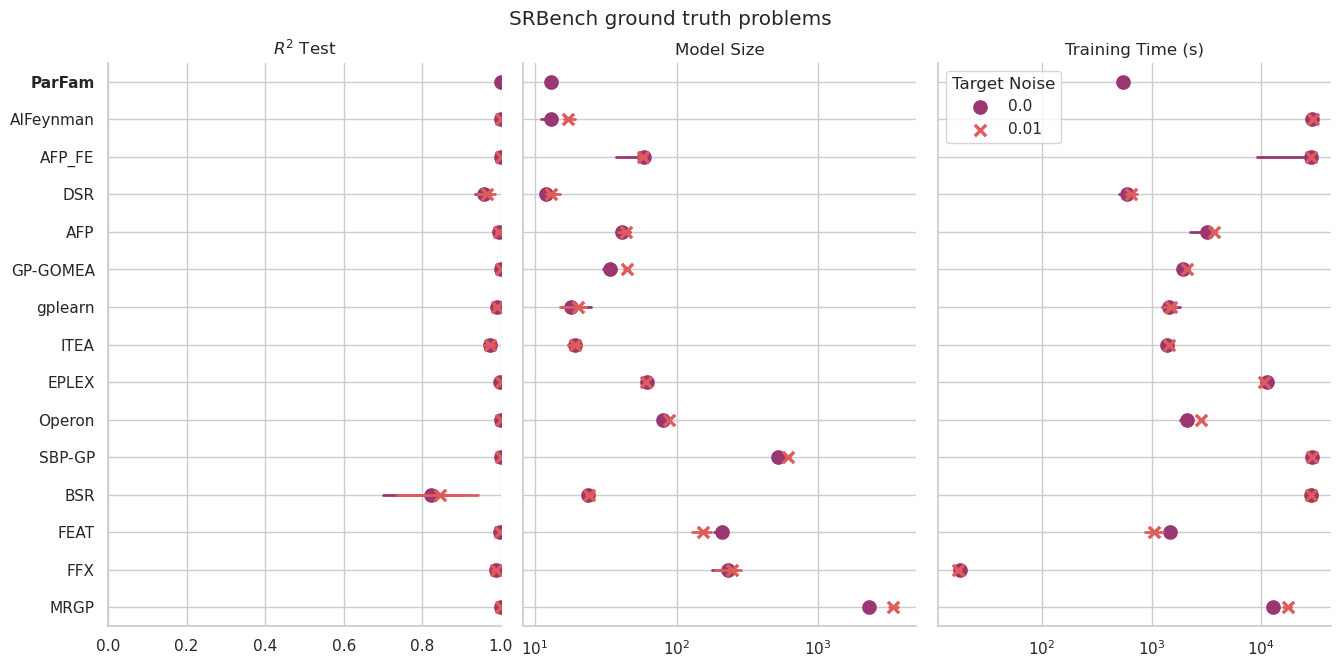

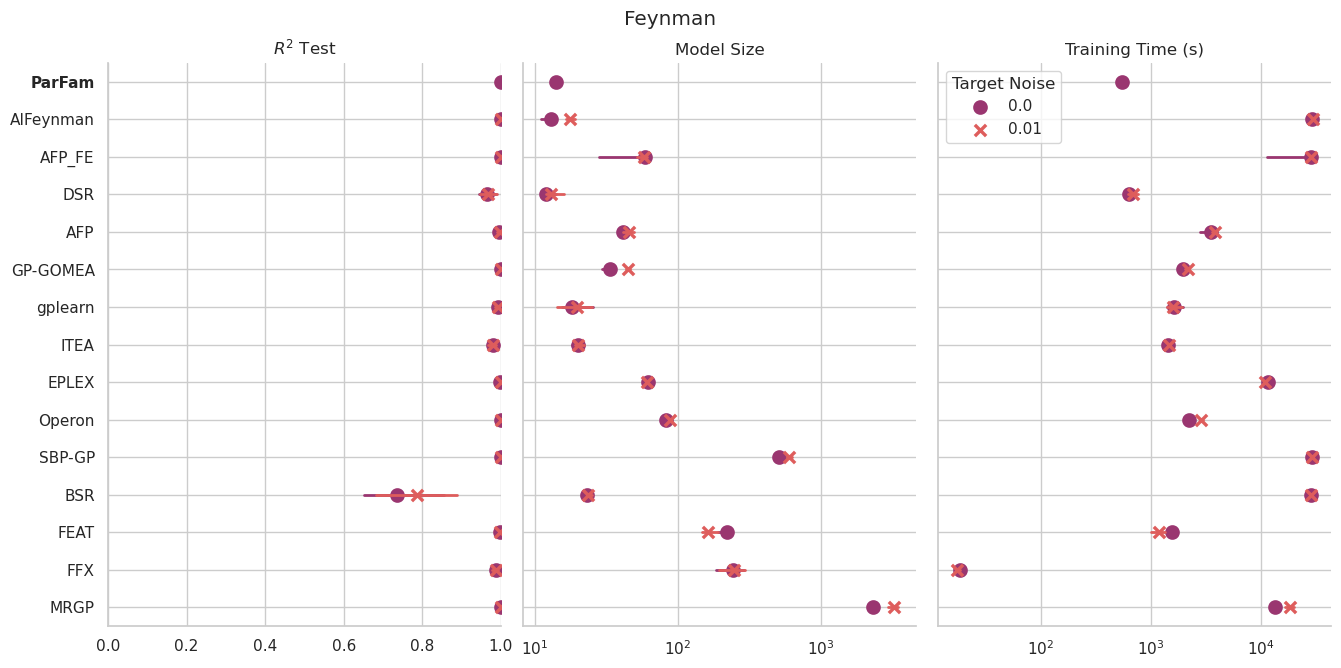

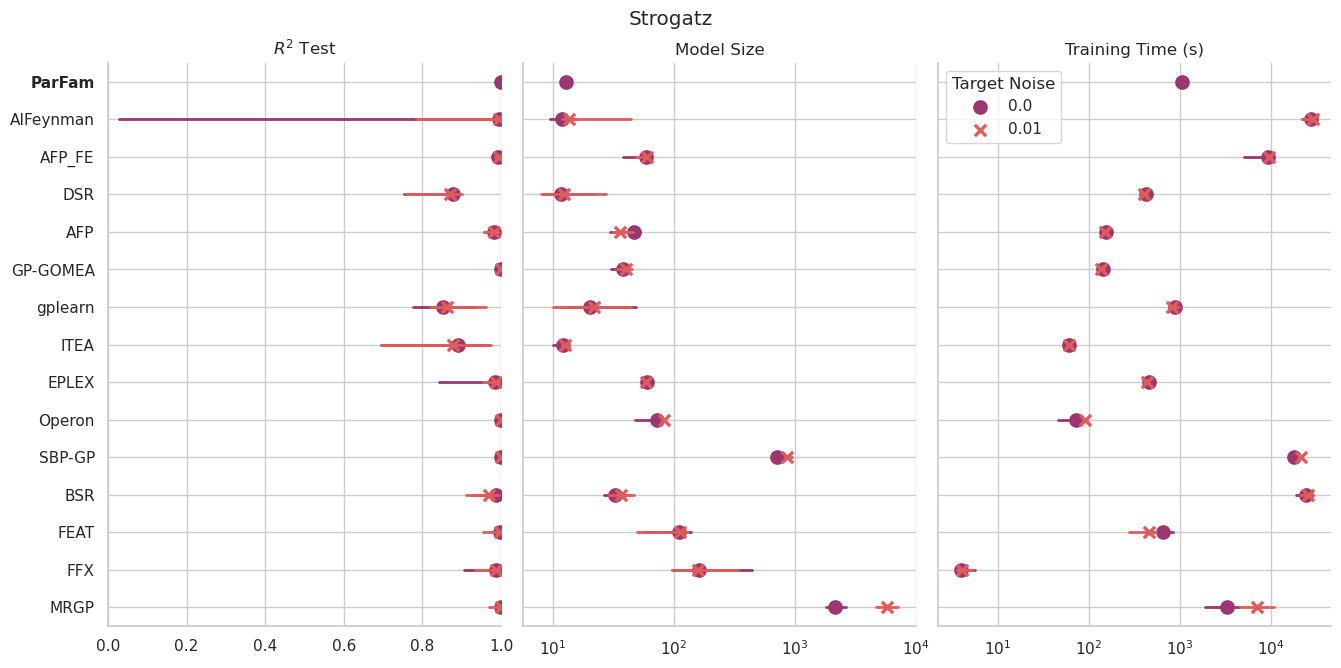

In [306]:
var = 0
# Make the PairGrid
df_plot = df_sum.copy()
tmp = df_plot.groupby(['target_noise','algorithm'])['symbolic_solution_rate'].mean().unstack().mean()
order = tmp.sort_values(ascending=False).index
df_plot['size_diff'] = df_plot['model_size']-df_plot['simplified_complexity']+1
x_vars=[
#         'accuracy_solution_rate_(%)',
#         'mse_test',
#         'r2_test_rank',
#         'r2_test_norm',
        #'symbolic_solution_rate_(%)',
        'r2_test',
        #'simplified_complexity',
#         'size_diff',
        'model_size',
        'training time (s)',
#         'solution'
]

for datagroup in ["","Feynman","Strogatz"]:
    pairgrid(df_plot,x_vars,datagroup)

## 4.3 Pareto Plot

Plot the method results as trade-offs between accuracy and simplicity

In [307]:
import pdb
from pareto_utils import front

In [308]:
# Compute Ranks
#Mean
df = df_sum[["algorithm","r2_test","model_size"]].groupby("algorithm").median()
#Standard deviation
df  = df.merge(df_sum[["algorithm","r2_test","model_size"]].groupby(["algorithm"]).std(),
                   on=['algorithm'],suffixes=('','_std'))
#Rank
df["model_size_rank"] = df["model_size"].rank()
df["r2_test_rank"] =  df["r2_test"].rank(ascending=False)
df

,r2_test,model_size,r2_test_std,model_size_std,model_size_rank,r2_test_rank
algorithm,,,,,,
AFP,0.993899,42.75,0.075177,16.613292,8.0,10.0
AFP_FE,0.999281,58.75,0.046473,20.427243,9.0,7.0
AIFeynman,0.999998,15.00,0.340120,381.617730,3.0,3.0
BSR,0.828909,24.00,0.292224,10.092831,6.0,15.0
DSR,0.957863,13.00,0.200353,8.202652,1.5,14.0
EPLEX,0.998746,61.25,0.099449,12.699236,10.0,8.0
FEAT,0.996945,178.00,0.179236,89.365389,12.0,9.0
FFX,0.986354,240.50,0.199907,207.963647,13.0,12.0
GP-GOMEA,0.999999,39.75,0.008037,11.974569,7.0,2.0


In [309]:
np.random.seed(42)
def bootstrap(val, n = 1000, fn=np.mean):
    val_samples = []
    for i in range(n):
        sample = np.random.randint(0,len(val)-1, size=len(val))
        val_samples.append( fn(val[sample]) )
    m = np.mean(val_samples)
    sd = np.std(val_samples)
    ci_upper  = np.quantile(val_samples,0.95)
    ci_lower  = np.quantile(val_samples,0.05)
    return m, sd, ci_upper,ci_lower

In [310]:
sns.set(font_scale=1, style='whitegrid')
labelsize=18
plt.figure(figsize=(7,7))
col = ["algorithm","r2_test_rank","model_size_rank"]
data = df.copy() #.loc[df_sum.algorithm.isin(symbolic_algs)]
#data['*algorithm*'] = data['algorithm'].apply(lambda x: x+'*' if x in symbolic_algs else x)
#data = data.drop(columns=["algorithm"])
xcol = 'r2_test_rank'
# xcol  = 'r2_test'
ycol = 'model_size_rank'
# ycol = 'model_size'
palette = 'viridis'
# outline pareto front
pareto_data = data

<Figure size 700x700 with 0 Axes>

PF: [12]
PF: [4, 2, 8]
PF: [9, 14, 0, 1, 11]
PF: [3, 5, 13, 10]
PF: [6]
PF: [7]
saving pareto_plot_r2_test_rank_model_size_rank.pdf


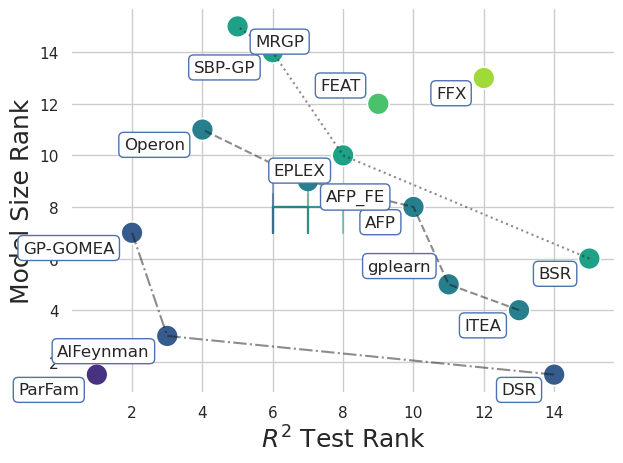

In [312]:
objs = pareto_data[[xcol,ycol]].values
# reverse R2 (objs are minimized)
# objs[:,0] = -objs[:,0]
levels = 6
styles=['-','-.','--',':', ':', ':',':',':']
PFs = []
pareto_ranks = -np.ones(len(pareto_data))
for el in range(levels):
#     pdb.set_trace()
    PF = front(objs[:,0],objs[:,1])
    if len(PF)>0:
        print('PF:',PF)
        pareto_ranks[PF] = el
    objs[PF,:] = np.inf
    PFs.append(PF)

i = 0
pareto_data.loc[:,'pareto_rank'] = pareto_ranks
for pfset in PFs:
    xset,yset = [],[]

    for pf in pfset:
        xset.append(pareto_data[xcol].values[pf])
        yset.append( pareto_data[ycol].values[pf] )
    linestyle=styles[i]
    plt.plot(xset,yset, styles[i]+'k', alpha=0.5, zorder=1)
#     plt.gca().set_zorder(10)
    i+=1

cmap = sns.color_palette(palette=palette, 
                         n_colors=pareto_data.pareto_rank.nunique(), 
                         desat=None, 
                         as_cmap=False)

ax = sns.scatterplot(
    ax = plt.gca(),
#     ax = g.ax_joint,
#     data = data.groupby('*algorithm*').median(),
    data = pareto_data,
    x = xcol,
    y = ycol,
#     style='*algorithm*',
#     style='pareto_rank',
    hue = 'pareto_rank',
    s=250,
#     palette=palette,
    #     edgecolor='k'
    legend=False,
    palette=cmap
)
ax.set_zorder(2)
xoff = .5
yoff = 0.3
# xoff, yoff = 0, 0
for idx,row in pareto_data.iterrows():
    x=row[xcol]-xoff
    y=row[ycol]-yoff
    ha='right'
    
    if idx in ['Linear','AFP_FE','MLP','MRGP']:
        x=row[xcol]+xoff
        ha='left'
    elif idx == 'Operon*':
        x = row[xcol]+1
        y -= yoff
    elif idx in ['gplearn','FEAT']:
#         x -= xoff
#         x=row[xcol]+xoff
        y = row[ycol]+1
#         ha='left'
        
    plt.text(s=idx,
             x = x, 
             y = y,
             ha=ha,
             va='top',
             bbox=dict(facecolor='w', edgecolor='b', boxstyle='round', alpha=1)
            )
    
# confidence intervals
i = 0
data=df_sum
for alg, dg in data.groupby('algorithm'):
    x = dg[xcol].median() 
    y = dg[ycol].median()
    _, sdx, ciux, cilx = bootstrap(dg[xcol].values, fn=np.median, n=1000)
    _, sdy, ciuy, cily = bootstrap(dg[ycol].values, fn=np.median, n=1000)

    plt.plot(
             [cilx,ciux],
             [y, y],
             alpha=0.5,
             color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
#              color='b'
            )
    plt.plot(
             [x, x],
             [cily,ciuy],
             alpha=0.5,
             color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
#              color='b'
            )
    i += 1
#ax.set_aspect(1.0)
#ax.set_xlim(left=0)
#ax.set_ylim(bottom=0)
ticksize=16
#plt.xticks([6,8,10],fontsize=ticksize)
#plt.yticks([6,8,10],fontsize=ticksize)
## ax.set_yscale('log')
plt.xlabel(xcol.replace('_',' ').replace('r2','$R^2$').title(), fontsize=labelsize)
plt.ylabel(ycol.replace('_',' ').title(), fontsize=labelsize)
sns.despine(left=True, bottom=True)
save(name="pareto_plot_"+xcol+'_'+ycol)

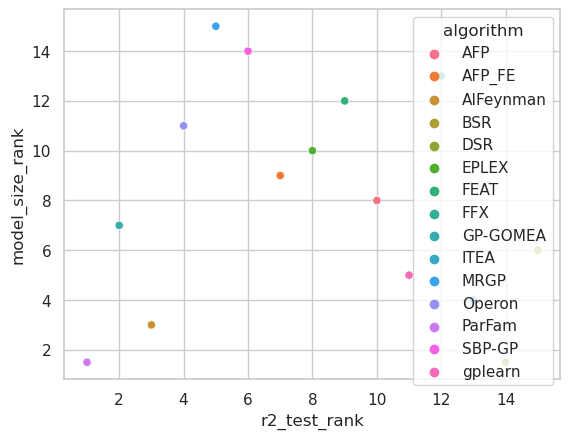

In [313]:
df = df_sum[["algorithm","r2_test","model_size"]].groupby("algorithm").median().reset_index()
df["model_size_rank"] = df["model_size"].rank()
df["r2_test_rank"] =  df["r2_test"].rank(ascending=False)
sns.scatterplot(data=df, x="r2_test_rank", y="model_size_rank", hue="algorithm")

In [317]:
df_sum[["training time (s)","algorithm"]].groupby("algorithm").mean()

,training time (s)
algorithm,
AFP,2954.877734
AFP_FE,21054.838698
AIFeynman,27901.764099
BSR,28234.006292
DSR,646.258909
EPLEX,9412.609902
FEAT,1303.412160
FFX,17.055988
GP-GOMEA,2738.190977
